In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [4]:
print('x_train_image:', len(x_train_image),x_train_image.shape)
print('x_test_image:',len(x_test_image), x_test_image.shape)

x_train_image: 60000 (60000, 28, 28)
x_test_image: 10000 (10000, 28, 28)


In [5]:
y_train_label[0]

5

In [6]:
import matplotlib.pyplot as plt 
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()
    
def plot_images_labels_prediction(images, labels, 
                                  prediction, idx, num=10): #(影像, 真實值, 預測結果, 資料開始index, 顯示筆數)
    fig = plt.gcf() #圖初始
    fig.set_size_inches(12, 14) #圖大小
    if num>25: num=25 #筆數限制
    for i in range(0, num):  
        ax = plt.subplot(5, 5, 1+i) #subgraph大小，位置(5行, 5列, 1開始位置)
        ax.imshow(images[idx], cmap='binary') #畫出subgraph
        title= "lable=" + str(labels[idx]) #subgraph title
        if len(prediction)>0:
            title+=",prediction="+str(prediction[idx]) #subgraph title with prediction
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx +=1
    plt.show()

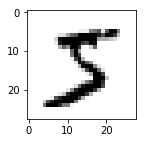

In [7]:
# plot single graph
plot_image(x_train_image[0])

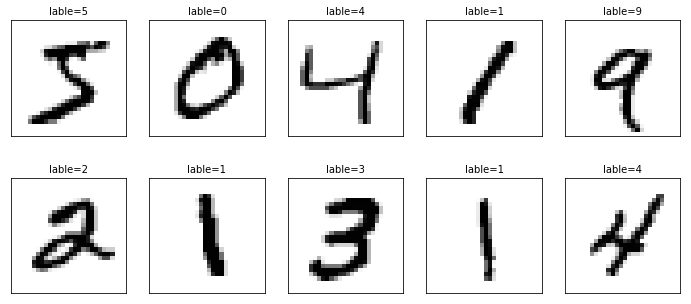

In [8]:
# plot multi graphs
plot_images_labels_prediction(x_train_image, y_train_label, [], 0, 10)

In [9]:
print(x_train_image.shape)
print(x_test_image.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [11]:
print(x_Train.shape)
print(x_Test.shape)
# print(x_Train[0])

(60000, 784)
(10000, 784)


In [12]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [13]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [14]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [15]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [17]:
model = Sequential()

In [18]:
model.add(Dense(units=1000,  #隱藏層神經元1000個
                input_dim=784, #輸入層神經元784個
                kernel_initializer='normal', #使用normal distribution常態分佈之亂數，初始化weight與bias
                activation='relu')) #激活函數為relu

In [19]:
model.add(Dropout(0.5))

In [20]:
model.add(Dense(units=1000,
                kernel_initializer='normal',
                activation='relu')) 

In [21]:
model.add(Dropout(0.5))

In [22]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [23]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
model.compile(loss='categorical_crossentropy', #設定loss function, 在深度學習常使用cross_entropy交叉熵，炫練效果較好。
              optimizer='adam', #設定訓練時的最優化方法，在深度學習使用adam最優化方法，可以讓訓練更快收斂，並提高準確率。
              metrics=['accuracy']) #設定評估模型的方式為accuracy準確率

In [25]:
train_history = model.fit(x=x_Train_normalize, #設定input X。
                          y=y_TrainOneHot, #設定output Y。
                          validation_split=0.2, #設定keras將資料分為80%訓練用(60000*0.8 =48000)，20%驗證用(12000)。
                          epochs=10, #設定訓練週期(輪epoch)10次。
                          batch_size=200, #每一批次200筆資料。所以一輪(1 epoch)大概會有(48000/200=240批次)
                          verbose=2) #顯示訓練過程。


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 7s - loss: 0.3687 - acc: 0.8849 - val_loss: 0.1351 - val_acc: 0.9607
Epoch 2/10
 - 4s - loss: 0.1588 - acc: 0.9511 - val_loss: 0.0989 - val_acc: 0.9699
Epoch 3/10
 - 4s - loss: 0.1186 - acc: 0.9623 - val_loss: 0.0874 - val_acc: 0.9734
Epoch 4/10
 - 3s - loss: 0.0982 - acc: 0.9699 - val_loss: 0.0854 - val_acc: 0.9746
Epoch 5/10
 - 4s - loss: 0.0855 - acc: 0.9723 - val_loss: 0.0841 - val_acc: 0.9766
Epoch 6/10
 - 3s - loss: 0.0756 - acc: 0.9756 - val_loss: 0.0778 - val_acc: 0.9755
Epoch 7/10
 - 3s - loss: 0.0660 - acc: 0.9789 - val_loss: 0.0728 - val_acc: 0.9773
Epoch 8/10
 - 3s - loss: 0.0586 - acc: 0.9817 - val_loss: 0.0775 - val_acc: 0.9775
Epoch 9/10
 - 4s - loss: 0.0555 - acc: 0.9818 - val_loss: 0.0743 - val_acc: 0.9793
Epoch 10/10
 - 4s - loss: 0.0535 - acc: 0.9829 - val_loss: 0.0776 - val_acc: 0.9788


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_train_history(train_histroy, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

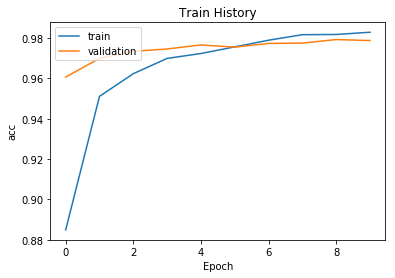

In [27]:
show_train_history(train_history, 'acc', 'val_acc')

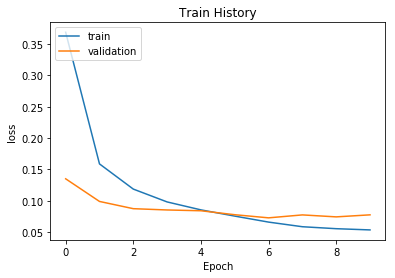

In [28]:
show_train_history(train_history, 'loss', 'val_loss')

In [29]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 118us/step

accuracy= 0.98


In [30]:
prediction = model.predict_classes(x_Test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

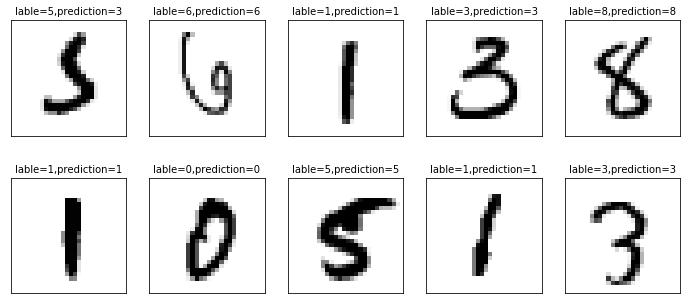

In [31]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340, num=10)

In [32]:
import pandas as pd 
pd.crosstab(y_test_label, 
            prediction,
            rownames=['label'],
            colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,1,0,2,0,0,2,1,1,0
1,0,1125,3,1,0,0,2,0,4,0
2,3,0,1019,1,1,0,2,3,3,0
3,1,0,14,988,0,2,0,3,2,0
4,3,2,3,0,962,0,4,1,1,6
5,2,0,0,9,1,866,7,0,5,2
6,2,2,0,0,2,1,951,0,0,0
7,1,7,10,3,1,0,0,1000,2,4
8,0,0,8,7,4,3,6,4,939,3


In [33]:
df = pd.DataFrame({'label':y_test_label, 'predict': prediction})
df.head()

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [34]:
df[(df.label==5)&(df.predict==3)].head()

,label,predict
340,5,3
1393,5,3
2597,5,3
2810,5,3
3702,5,3


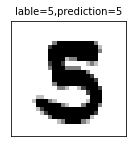

In [35]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=1003, num=1)